In [1]:
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
scale = "15"
fps = 30
seq_length = 30
full_length = 600

In [3]:
segments_upward = pd.read_csv('/home/user/Documents/Vivek/cuda/DirectionalCorrelation/Data/Output/golden_shiners/' + 'segup_' + scale + '_seq' + str(int(seq_length/fps)) + '.csv')
segments_downward = pd.read_csv('/home/user/Documents/Vivek/cuda/DirectionalCorrelation/Data/Output/golden_shiners/' + 'segdown_' + scale + '_seq' + str(int(seq_length/fps)) + '.csv')

bootu = pd.read_csv('/home/user/Documents/Vivek/cuda/DirectionalCorrelation/Data/Output/golden_shiners/' + 'bootup_' + scale + '_seq' + str(int(seq_length/fps)) + '.csv')
bootd = pd.read_csv('/home/user/Documents/Vivek/cuda/DirectionalCorrelation/Data/Output/golden_shiners/' + 'bootdown_' + scale + '_seq' + str(int(seq_length/fps)) + '.csv')

In [4]:
segu = segments_upward.groupby(['frame'])['ang_pos', 'dist', 'speed_diff', 'acc_diff', 'cc'].mean().reset_index()
segd = segments_downward.groupby(['frame'])['ang_pos', 'dist', 'speed_diff', 'acc_diff', 'cc'].mean().reset_index()

segu.columns = ['frame', 'apu', 'distu', 'sdu', 'adu', 'ccu']
segd.columns = ['frame', 'apd', 'distd', 'sdd', 'add', 'ccd']

segments = pd.merge(segu, segd)

In [5]:
bootu_h = bootu.groupby(['frame'])['apu', 'distu', 'sdu', 'adu', 'ccu'].quantile(0.975).reset_index()
bootu_l = bootu.groupby(['frame'])['apu', 'distu', 'sdu', 'adu', 'ccu'].quantile(0.025).reset_index()
bootd_h = bootd.groupby(['frame'])['apd', 'distd', 'sdd', 'add', 'ccd'].quantile(0.975).reset_index()
bootd_l = bootd.groupby(['frame'])['apd', 'distd', 'sdd', 'add', 'ccd'].quantile(0.025).reset_index()

bootu_h.columns = ['frame', 'apu_h', 'distu_h', 'sdu_h', 'adu_h', 'ccu_h']
bootu_l.columns = ['frame', 'apu_l', 'distu_l', 'sdu_l', 'adu_l', 'ccu_l']
bootd_h.columns = ['frame', 'apd_h', 'distd_h', 'sdd_h', 'add_h', 'ccd_h']
bootd_l.columns = ['frame', 'apd_l', 'distd_l', 'sdd_l', 'add_l', 'ccd_l']

bootu = pd.merge(bootu_h, bootu_l)
bootd = pd.merge(bootd_h, bootd_l)
bootstraps = pd.merge(bootu, bootd)

In [6]:
len(np.unique(segments_upward['event'])), len(np.unique(segments_downward['event']))

(3840, 3880)

#### Effect of kinematics relative to neighbour

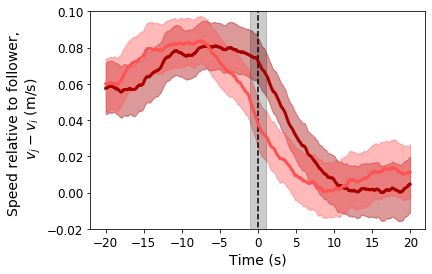

In [17]:
plt.plot(segments['frame']/fps, segments['sdu'], c='#a70000', linewidth=3)
plt.plot(segments['frame']/fps, segments['sdd'], c='#ff5252', linewidth=3)

plt.fill_between(bootstraps['frame']/fps, bootstraps['sdu_l'], bootstraps['sdu_h'], color='#a70000', alpha=0.4)
plt.fill_between(bootstraps['frame']/fps, bootstraps['sdd_l'], bootstraps['sdd_h'], color='#ff5252', alpha=0.4)

plt.axvspan(-seq_length/fps, seq_length/fps, alpha=0.2, color='black')
plt.vlines(0,  -0.05, 0.13, color='black', linestyles='dashed')
if scale == '07':
    plt.ylim(-0.05, 0.1)
elif scale == '15':
    plt.ylim(-0.02, 0.1)
elif scale == '30':
    plt.ylim(0.02, 0.13)
else:
    plt.ylim(0.015, 0.125)
    
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Speed relative to follower, \n $v_j - v_i$ (m/s)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('/home/user/Documents/Vivek/cuda/DirectionalCorrelation/Figures/golden_shiners/speed_diff_' + scale + '_seq' + str(int(seq_length/fps)) + '.png', format='png', dpi=600, bbox_inches="tight")

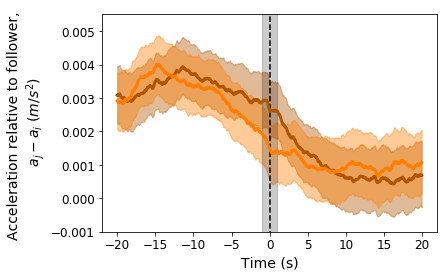

In [8]:
plt.plot(segments['frame']/fps, segments['adu'], c='#b05600', linewidth=3)
plt.plot(segments['frame']/fps, segments['add'], c='#ff7d00', linewidth=3)

plt.fill_between(bootstraps['frame']/fps, bootstraps['adu_l'], bootstraps['adu_h'], color='#b05600', alpha=0.4)
plt.fill_between(bootstraps['frame']/fps, bootstraps['add_l'], bootstraps['add_h'], color='#ff7d00', alpha=0.4)

plt.axvspan(-seq_length/fps, seq_length/fps, alpha=0.2, color='black')
plt.vlines(0,  -0.004, 0.006, color='black', linestyles='dashed')
if scale == '07':
    plt.ylim(-0.0015, 0.0035)
elif scale == '15':
    plt.ylim(-0.001, 0.0055)
elif scale == '30':
    plt.ylim(-0.001, 0.0055)
else:
    plt.ylim(-0.004, 0.004)

plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Acceleration relative to follower, \n $a_j - a_i$ ($m/s^2$)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('/home/user/Documents/Vivek/cuda/DirectionalCorrelation/Figures/golden_shiners/acc_diff_' + scale + '_seq' + str(int(seq_length/fps)) + '.png', format='png', dpi=600, bbox_inches="tight")

#### Effect of distance and angular position on leadership

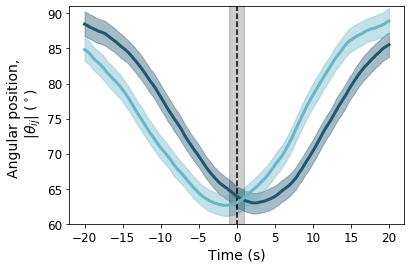

In [13]:
plt.plot(segments['frame']/fps, segments['apu']*180/np.pi, c='#20576e', linewidth=3)
plt.plot(segments['frame']/fps, segments['apd']*180/np.pi, c='#6ab6c6', linewidth=3)

plt.fill_between(bootstraps['frame']/fps, bootstraps['apu_l']*180/np.pi, bootstraps['apu_h']*180/np.pi, color='#20576e', alpha=0.4)
plt.fill_between(bootstraps['frame']/fps, bootstraps['apd_l']*180/np.pi, bootstraps['apd_h']*180/np.pi, color='#6ab6c6', alpha=0.4)

plt.axvspan(-seq_length/fps, seq_length/fps, alpha=0.2, color='black')
plt.vlines(0, 45, 97, color='black', linestyles='dashed')
if scale == '07':
    plt.ylim(65, 93)
elif scale == '15':
    plt.ylim(60, 91)
elif scale == '30':
    plt.ylim(55, 85)
else:
    plt.ylim(45, 73)
    
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Angular position, \n $|\\theta_{ij}|$ ($^\circ$)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('/home/user/Documents/Vivek/cuda/DirectionalCorrelation/Figures/golden_shiners/ang_pos_' + scale + '_seq' + str(int(seq_length/fps)) + '.png', format='png', dpi=600, bbox_inches="tight")

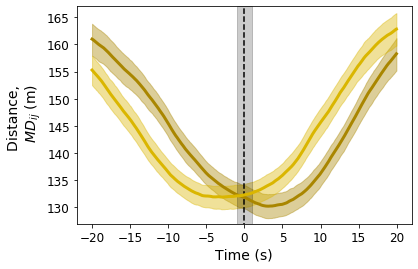

In [15]:
plt.plot(segments['frame']/fps, segments['distu'], c='#a98600', linewidth=3)
plt.plot(segments['frame']/fps, segments['distd'], c='#dab600', linewidth=3)

plt.fill_between(bootstraps['frame']/fps, bootstraps['distu_l'], bootstraps['distu_h'], color='#a98600', alpha=0.4)
plt.fill_between(bootstraps['frame']/fps, bootstraps['distd_l'], bootstraps['distd_h'], color='#dab600', alpha=0.4)

plt.axvspan(-seq_length/fps, seq_length/fps, alpha=0.2, color='black')
plt.vlines(0, 110, 185, color='black', linestyles='dashed')
if scale == '07':
    plt.ylim(140, 185)
elif scale == '15':
    plt.ylim(127,167)
elif scale == '30':
    plt.ylim(120,145)
else:
    plt.ylim(115,138)
    
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Distance, \n $MD_{ij}$ (m)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('/home/user/Documents/Vivek/cuda/DirectionalCorrelation/Figures/golden_shiners/dist_' + scale + '_seq' + str(int(seq_length/fps)) + '.png', format='png', dpi=600, bbox_inches="tight")